In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
dataset=pd.read_csv('data.csv')
dataset.head(30)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
dataset.shape

(2000, 8)

In [ ]:
dataset.isnull().any()

ID                 False
Sex                False
Marital status     False
Age                False
Education          False
Income             False
Occupation         False
Settlement size    False
dtype: bool

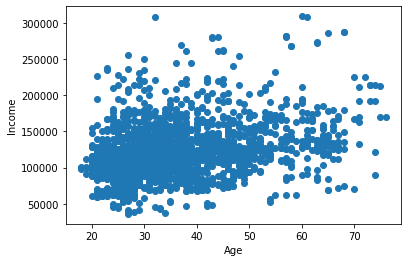

In [ ]:
plt.scatter(dataset['Age'],dataset['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [ ]:
X= dataset.iloc[:,3:6]
X

,Age,Education,Income
0,67,2,124670
1,22,1,150773
2,49,1,89210
3,45,1,171565
4,53,1,149031
...,...,...,...
1995,47,1,123525
1996,27,1,117744
1997,31,0,86400
1998,24,1,97968


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
minmax_dataset = scaler.fit_transform(X)
minmax_dataset = pd.DataFrame(minmax_dataset,columns =X.columns)
X=minmax_dataset
minmax_dataset

,Age,Education,Income
0,0.844828,0.666667,0.324781
1,0.068966,0.333333,0.420210
2,0.534483,0.333333,0.195144
3,0.465517,0.333333,0.496223
4,0.603448,0.333333,0.413842
...,...,...,...
1995,0.500000,0.333333,0.320595
1996,0.155172,0.333333,0.299460
1997,0.224138,0.000000,0.184871
1998,0.103448,0.333333,0.227162


In [ ]:
#_______________________________________________________________________________________

In [ ]:
# Minisom library and module is used for performing Self Organizing Maps
#from minisom import MiniSom
# Set the hyper parameters
#som_grid_rows = 10
#som_grid_columns = 10
#iterations = 2000
#sigma = 1
#learning_rate = 0.5

In [ ]:
X

,Age,Education,Income
0,0.844828,0.666667,0.324781
1,0.068966,0.333333,0.420210
2,0.534483,0.333333,0.195144
3,0.465517,0.333333,0.496223
4,0.603448,0.333333,0.413842
...,...,...,...
1995,0.500000,0.333333,0.320595
1996,0.155172,0.333333,0.299460
1997,0.224138,0.000000,0.184871
1998,0.103448,0.333333,0.227162


In [ ]:
X = X.values

In [ ]:
X

array([[0.84482759, 0.66666667, 0.32478101],
       [0.06896552, 0.33333333, 0.42021043],
       [0.53448276, 0.33333333, 0.19514353],
       ...,
       [0.22413793, 0.        , 0.18487051],
       [0.10344828, 0.33333333, 0.22716172],
       [0.12068966, 0.        , 0.11912317]])

In [ ]:
#!pip install minisom
 
from minisom import MiniSom
 
# Initializing neurons and Training
n_neurons = 10
m_neurons = 10
som = MiniSom(n_neurons, m_neurons, input_len=3, sigma=1.5,learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)
 
som.pca_weights_init(X)
som.train(X, 1000, verbose=True)  # random training

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.045559198950485935


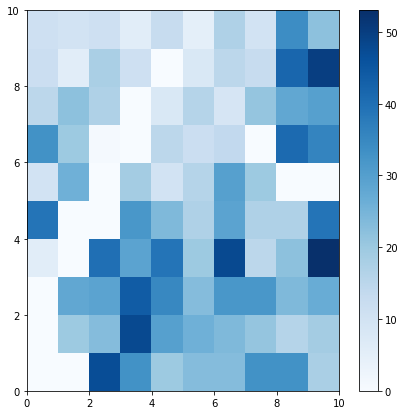

In [ ]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(X)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()